In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
def checkBlockingSet(candidateSet,adjacencyMatrix):
    for node, neighbors in adjacencyMatrix.items():
        if node in candidateSet: continue
        if len(set(candidateSet).intersection(set(neighbors))) == 1:
            return False
    return True
        
def makeGridAdjacencyMatrix(rows,cols):
    adjacencyMatrix = {}
    for r in range(rows):
        for c in range(cols):
            tmp = [(r+1,c),(r-1,c),(r,c+1),(r,c-1)]
            
            adjacencyMatrix[(r,c)] = [t for t in tmp if min(t) >= 0 and t[0] < rows and t[1] < cols]
            
    return adjacencyMatrix

def plotBlockingSet(A,B):
    plt.figure(figsize=(20,10))
    for node, neighbors in A.items():
        plt.plot(node[1],node[0],'ko',markersize=20,markeredgecolor='k')
        for neighbor in neighbors:
            plt.plot((node[1],neighbor[1]),(node[0],neighbor[0]),'k')
            
    for node in A.keys():
        if node in B:
            plt.plot(node[1],node[0],'ro',markersize=20)
            
    plt.gca().set_aspect('equal')
    
    xlim = max([node[1] for node in A.keys()])
    ylim = max([node[0] for node in A.keys()])
    
    plt.xlim((-0.5,xlim+0.5))
    plt.ylim((-0.5,ylim+0.5))
    plt.show()

In [3]:
def makeLoopBlockingSet(rows,cols):
    out = []
    sign = -1
    row = 1
    for i in range(cols):
        row += sign
        out += [(row,i)]
        if row == rows-1 or row == 0: sign *= -1 
            
    for i in range(cols):
        row += sign
        new = (row,cols-i-2)
        if new in out: break
        out += [new]
        if row == rows-1 or row == 0: sign *= -1
    
    return out

def makeDeniseBlockingSet(rows,cols):
    skips = (cols-1)%(rows-1)
    
    out = []
    sign = -1
    row = 1
    i = 0
    while i < cols:
        row += sign
        out += [(row,i)]
        if row == rows-1 or row == 0: 
            if skips >= 2 and i != 0:
                skips -= 2
                i += 2
                out += [(row,i)]
            elif skips == 1 and i != 0:
                skips -= 1
                i += 1
                out += [(row,i)]
            elif skips == 0 and i != 0:
                i += 0
            sign *= -1
            
        i += 1
    
    return out    
    
    

In [4]:
def testTroxellBlocking(rows, cols, draw=True, printRes= True):
    A = makeGridAdjacencyMatrix(rows,cols)
    dt = makeDeniseBlockingSet(rows,cols)
    if draw:
        plotBlockingSet(A,dt)
    works = checkBlockingSet(dt,A)
    size = len(dt)
    if printRes:
        print('Works?:',works)
        print('Size:', size)
    return works, size
    
def testLoopingBlocking(rows, cols, draw=True, printRes= True):
    A = makeGridAdjacencyMatrix(rows,cols)
    dt = makeLoopBlockingSet(rows, cols)
    if draw:
        plotBlockingSet(A,dt)
    works = checkBlockingSet(dt,A)
    size = len(dt)
    if printRes:
        print('Works?:',works)
        print('Size:', size)
    return works, size

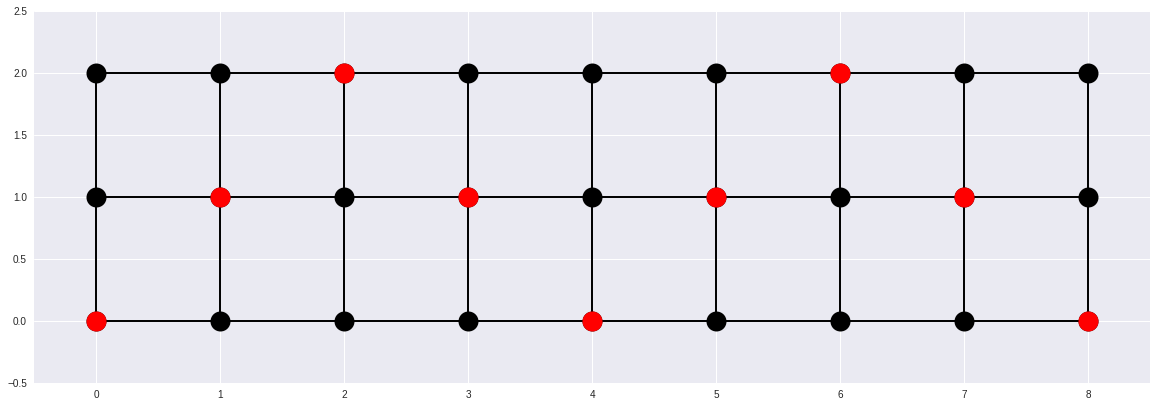

Works?: True
Size: 9


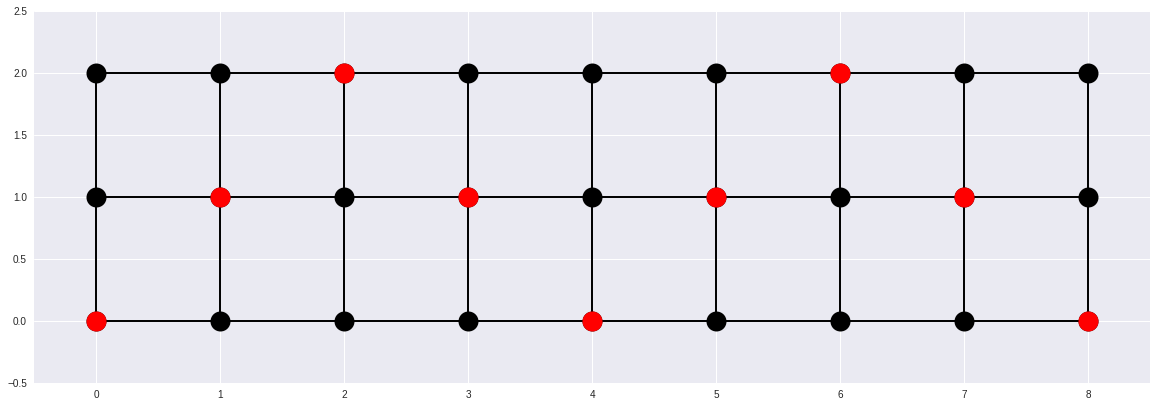

Works?: True
Size: 9


(True, 9)

In [5]:
r, c = 3,9

testTroxellBlocking(r, c)
testLoopingBlocking(r, c)

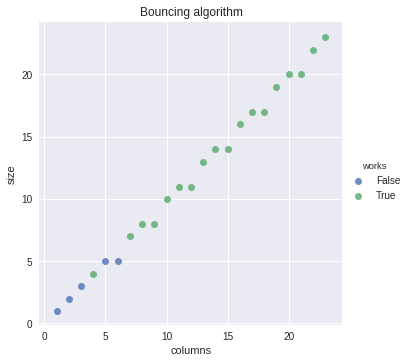

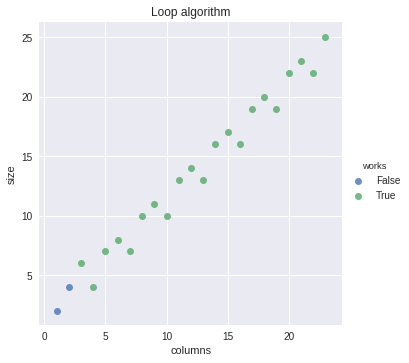

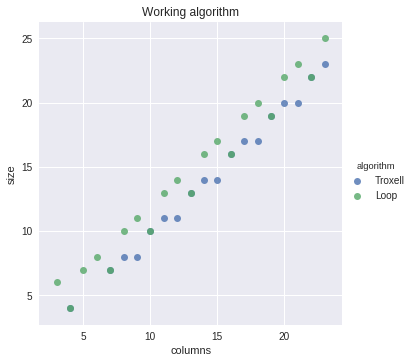

In [6]:
r = 4
columns = ['works', 'size', 'columns', 'algorithm']
dfT = pd.DataFrame(columns=columns)
dfL = pd.DataFrame(columns=columns)
for c in range(1, 6*r):
    worksT, sizeT = testTroxellBlocking(r, c, draw=False, printRes=False)
    worksL, sizeL = testLoopingBlocking(r, c, draw=False, printRes=False)
    frameT = pd.DataFrame([[worksT, sizeT, c, 'Troxell']], columns=columns)
    dfT = dfT.append(frameT, ignore_index=True)
    frameL = pd.DataFrame([[worksL, sizeL, c, 'Loop']], columns=columns)
    dfL = dfL.append(frameL, ignore_index=True)
    
sns.lmplot( x="columns", y="size", data=dfT, hue='works', fit_reg=False)
plt.title("Bouncing algorithm")
plt.show()
sns.lmplot( x="columns", y="size", data=dfL, hue='works', fit_reg=False)
plt.title("Loop algorithm")

dfWorking = dfT.loc[dfT['works']].append(dfL.loc[dfL['works']])
sns.lmplot( x="columns", y="size", data=dfWorking, hue='algorithm', fit_reg=False)
plt.title("Working algorithm")
plt.show()

# Optimizing the types of bounces

In [7]:

def makeOptimalZigZagBlockingSet(rows,cols):
    b = math.ceil((cols - rows) / (rows + 1))
    c = cols - (b+1) * rows
    
    
    
    skips = max(c, 0) + ((b - abs(c)) // 2) 
    
    direction = 1
    curr_row = 0
    curr_col = 0
    out = []
    
    while curr_col < cols:
        out.append((curr_row, curr_col))
        
        next_row = curr_row + direction
        if next_row >= rows or next_row < 0:
            direction = -direction
            if (skips > 0):
                curr_col += 2
                c -= 1
                skips -= 1
            else:
                curr_col += 1
                if c < 0:
                    c+=1
                    curr_row += direction
        else:
            curr_row = next_row
            curr_col += 1
        
    return out    
    
def testOptimalZigZagBlocking(rows, cols, draw=True, printRes= True):
    A = makeGridAdjacencyMatrix(rows,cols)
    dt = makeOptimalZigZagBlockingSet(rows,cols)
    if draw:
        plotBlockingSet(A,dt)
    works = checkBlockingSet(dt,A)
    size = len(dt)
    if printRes:
        print('Works?:',works)
        print('Size:', size)
    return works, size

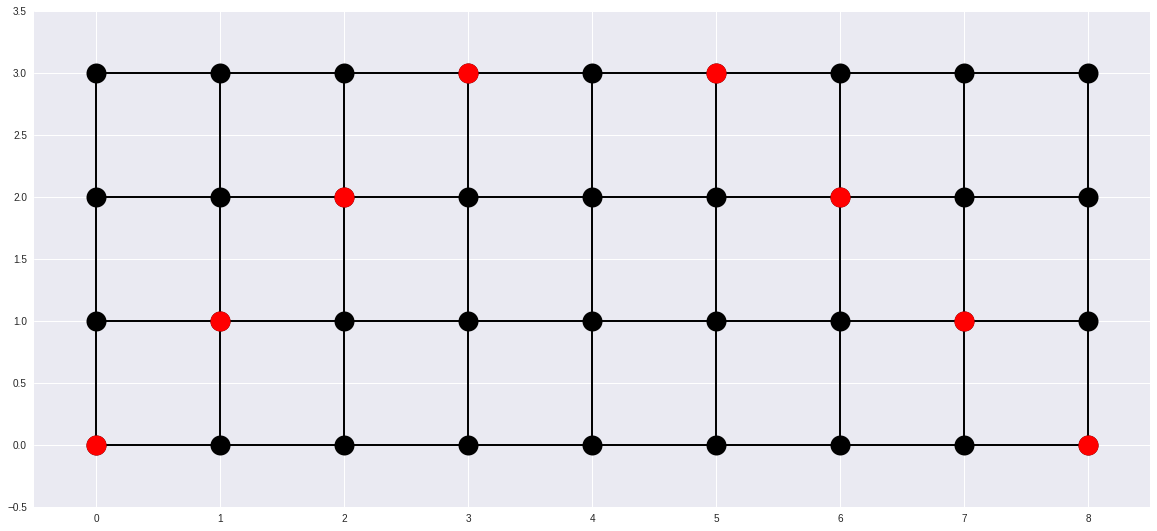

Works?: True
Size: 8


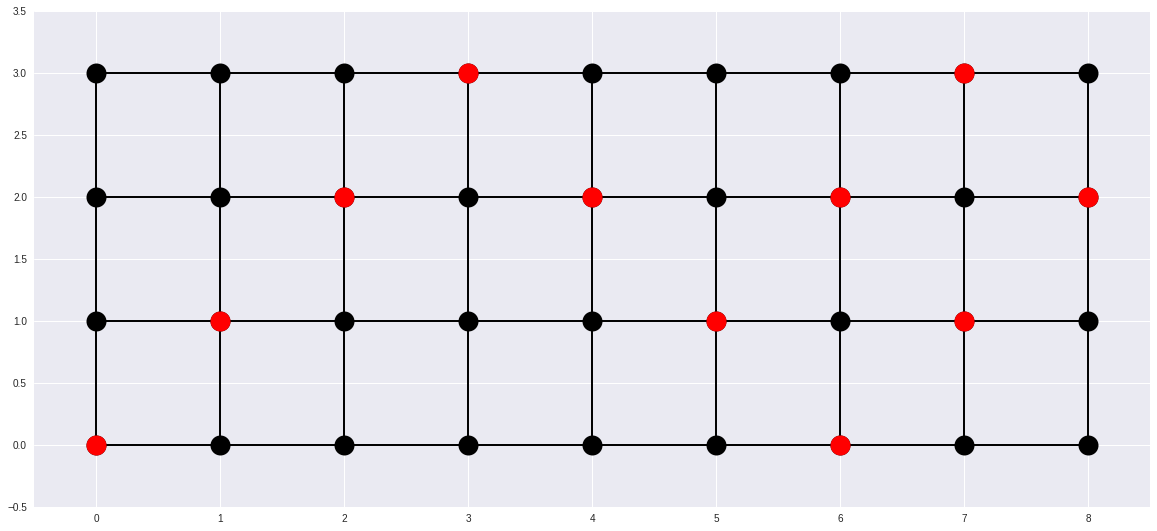

Works?: True
Size: 11


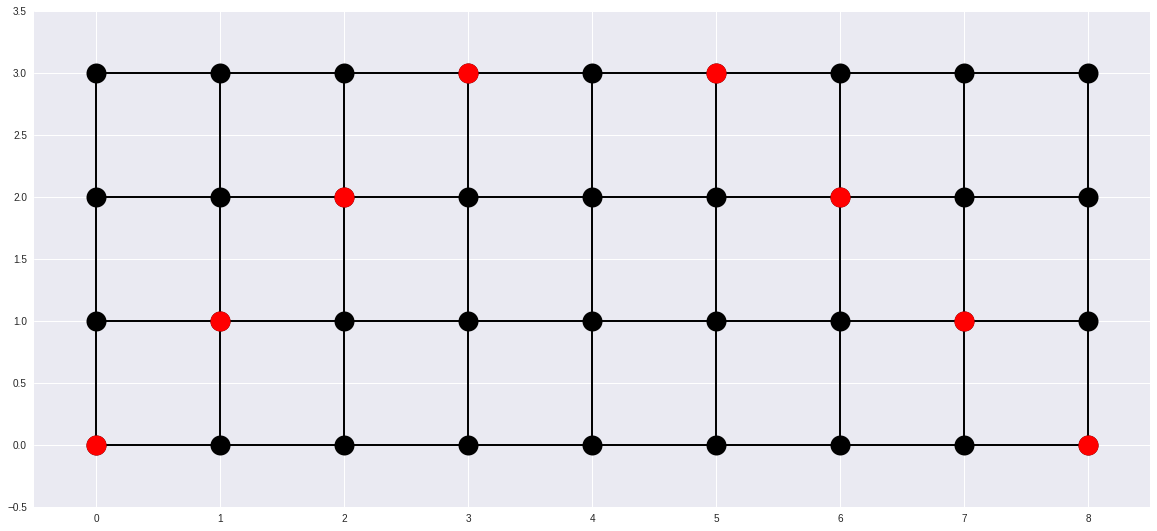

Works?: True
Size: 8


(True, 8)

In [8]:
r, c = 4,9

testTroxellBlocking(r, c)
testLoopingBlocking(r, c)
testOptimalZigZagBlocking(r, c)

gamma didn't work but the algorithm did, dim 5 5
gamma didn't work but the algorithm did, dim 5 9
gamma didn't work but the algorithm did, dim 5 10
gamma didn't work but the algorithm did, dim 5 11


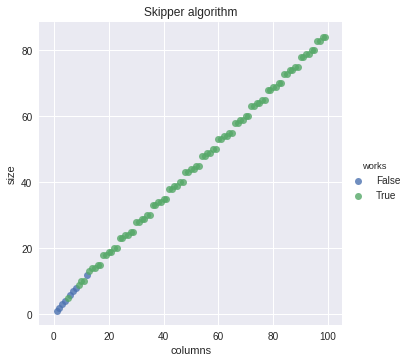

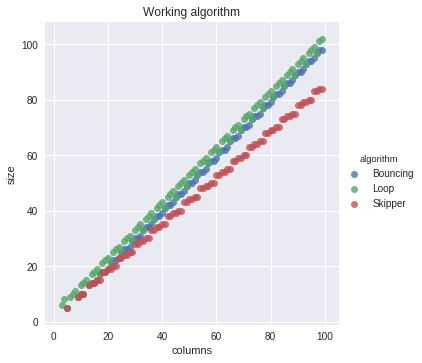

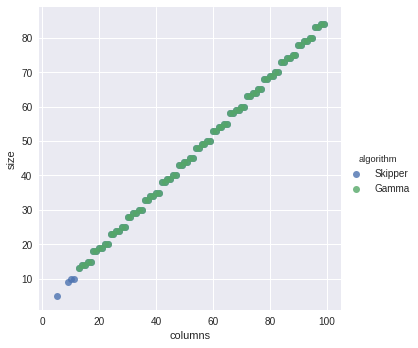

In [12]:
def calcSkipperGamma(rows, cols):
    b = math.ceil((cols - rows) / (rows + 1))
    c = cols - (b+1) * r
    if c >= 0:
        gamma = cols - c - (b - c)//2
    else:
        gamma = cols - (b + c)//2
    gammaWorks = cols >= (math.ceil(rows/2)*(rows-1) + 1)
    return gammaWorks, gamma

r = 5
# recording the results for each algorithm
columns = ['works', 'size', 'columns', 'algorithm']
dfT = pd.DataFrame(columns=columns)
dfL = pd.DataFrame(columns=columns)
dfO = pd.DataFrame(columns=columns)
dfGamma = pd.DataFrame(columns=columns)
for c in range(1, 20*r):
    worksT, sizeT = testTroxellBlocking(r, c, draw=False, printRes=False)
    worksL, sizeL = testLoopingBlocking(r, c, draw=False, printRes=False)
    worksO, sizeO = testOptimalZigZagBlocking(r, c, draw=False, printRes=False)
    frameT = pd.DataFrame([[worksT, sizeT, c, 'Bouncing']], columns=columns)
    dfT = dfT.append(frameT, ignore_index=True)
    frameL = pd.DataFrame([[worksL, sizeL, c, 'Loop']], columns=columns)
    dfL = dfL.append(frameL, ignore_index=True)
    frameO = pd.DataFrame([[worksO, sizeO, c, 'Skipper']], columns=columns)
    dfO = dfO.append(frameO, ignore_index=True)
    
    gammaWorks, gamma = calcSkipperGamma(r, c)
    frameGamma = pd.DataFrame([[gammaWorks, gamma, c, 'Gamma']], columns=columns)
    dfGamma = dfGamma.append(frameGamma, ignore_index=True)
    
    # ensuring our gamma calculation is correct
    if gammaWorks:
        if not worksO:
            print("gamma worked but the algorithm did not, dim", r, c)
        elif gamma != sizeO:
            print("gamma and algorithm did not match up, gamma is ", gamma, " and set size is ", sizeO)
    elif worksO:
        print("gamma didn't work but the algorithm did, dim", r, c)
    
# sns.lmplot( x="columns", y="size", data=dfT, hue='works', fit_reg=False)
# plt.title("Bouncing algorithm")
# # plt.show()
# sns.lmplot( x="columns", y="size", data=dfL, hue='works', fit_reg=False)
# plt.title("Loop algorithm")

sns.lmplot( x="columns", y="size", data=dfO, hue='works', fit_reg=False)
plt.title("Skipper algorithm")

dfWorking = dfT.loc[dfT['works']].append(dfL.loc[dfL['works']]).append(dfO.loc[dfO['works']])
sns.lmplot( x="columns", y="size", data=dfWorking, hue='algorithm', fit_reg=False)
plt.title("Working algorithm")

dfOAndGamma = dfO.loc[dfO['works']].append(dfGamma.loc[dfGamma['works']])
sns.lmplot( x="columns", y="size", data=dfOAndGamma, hue='algorithm', fit_reg=False)


plt.show()